Just run the next cell and it will do the reading, merging, computing and spliting

## TfIdf

In [2]:
# Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from nltk.stem.snowball import EnglishStemmer
from nltk import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as cv
import sklearn.neighbors as nb
import pandas as pd
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

stemmer = EnglishStemmer(ignore_stopwords=True)
tokenize = TfidfVectorizer().build_tokenizer()


def stemmed_words(doc):
    return (stemmer.stem(w) for w in tokenize(doc))

# Function to get the tf_idf scores for a list of strings representing a title
# takes a list of strings as parameters
def pre_tfidf2(data):
    nr_pattern = re.compile(r'\b[+-]?\d*[.,]?\d+([eE][+-]?\d+)?\b')
    acronyms = re.compile(r'\b(\w)[.+:\-]')
    non_alphanum = re.compile(r'[^\w\d\-\+\s]')
    for i in range(len(data)):
        title = acronyms.sub(r'\1', data[i])
        title = non_alphanum.sub(' ', title)
        data[i] = nr_pattern.sub('NUMBER_SPECIAL_TOKEN', title)
    vectorizer = TfidfVectorizer(
        tokenizer=stemmed_words, stop_words=stopwords.words('english'), max_features=1000)
    X = vectorizer.fit_transform(data)
    # features = vectorizer.get_feature_names()
    return X.toarray()


# reading the data
dt_true = pd.read_csv('clickbait_data.txt', sep='\n', names=['Title'])
dt_false = pd.read_csv('non_clickbait_data.txt', sep='\n', names=['Title'])
dt_true = dt_true.assign(Label=lambda x: True)
dt_false = dt_false.assign(Label=lambda x: False)

# merging the data
dt = pd.concat([dt_true, dt_false], ignore_index=True)

# shulffing data
dt = shuffle(dt).reset_index(drop=True)

# computing tf-idf
X = pre_tfidf2(dt['Title'].to_list())  # tf_idf scores
y = dt['Label']  # labels


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Frequencies

In [ ]:
# Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from nltk.stem.snowball import EnglishStemmer
from nltk import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as cv
import sklearn.neighbors as nb
import pandas as pd
import nltk
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

stemmer = EnglishStemmer(ignore_stopwords=True)
tokenize = CountVectorizer().build_tokenizer()


def stemmed_words(doc):
    return (stemmer.stem(w) for w in tokenize(doc))

# Function to get the tf_idf scores for a list of strings representing a title
# takes a list of strings as parameters
def count(data):
    nr_pattern = re.compile(r'\b[+-]?\d*[.,]?\d+([eE][+-]?\d+)?\b')
    acronyms = re.compile(r'\b(\w)[.+:\-]')
    non_alphanum = re.compile(r'[^\w\d\-\+\s]')
    for i in range(len(data)):
        title = acronyms.sub(r'\1', data[i])
        title = non_alphanum.sub(' ', title)
        data[i] = nr_pattern.sub('NUMBER_SPECIAL_TOKEN', title)
    vectorizer = CountVectorizer(
        tokenizer=stemmed_words, stop_words=stopwords.words('english'), max_features=1000)
    X = vectorizer.fit_transform(data)
    # features = vectorizer.get_feature_names()
    # frq = X.toarray().sum(axis=0)
    # d = sorted(zip(features, frq), key=lambda v: v[1], reverse=True)
    # x = [t[0] for t in d]
    # y = [t[1] for t in d]
    return X.toarray()


# reading the data
dt_true = pd.read_csv('clickbait_data.txt', sep='\n', names=['Title'])
dt_false = pd.read_csv('non_clickbait_data.txt', sep='\n', names=['Title'])
dt_true = dt_true.assign(Label=lambda x: True)
dt_false = dt_false.assign(Label=lambda x: False)

# merging the data
dt = pd.concat([dt_true, dt_false], ignore_index=True)

# shulffing data
dt = shuffle(dt).reset_index(drop=True)

# computing tf-idf
X = count(dt['Title'].to_list())  # tf_idf scores
y = dt['Label']  # labels

 <!-- LTeX: language=us -->
## At this point the variable `y` contains the TF_IDF scores and `X` hase the lables in the same order (not 100% shure about the order, but mostly yes)

In [8]:
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=1)

# Create a kNN classifier object
knc = nb.KNeighborsClassifier(n_neighbors=4, weights="distance")

# Train the classifier
knc.fit(X_train, y_train)

# Obtain accuracy score of learned classifier on test data
print(knc.score(X_test, y_test))


0.8538541666666667


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[4208  578]
 [ 753 4061]]


In [ ]:
# Obtain Recall, Precision and F-Measure for each class
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.88      0.86      4786
        True       0.88      0.84      0.86      4814

    accuracy                           0.86      9600
   macro avg       0.86      0.86      0.86      9600
weighted avg       0.86      0.86      0.86      9600



In [ ]:
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score

cv_scores = cross_val_score(nb.KNeighborsClassifier(),  
                            X=X,  
                            y=y,  
                            cv=10, scoring='accuracy')  

# cv_scores is a list with 10 accuracies (one for each validation)
print(cv_scores)

[0.85875   0.8690625 0.860625  0.8453125 0.8496875 0.8634375 0.8628125
 0.87125   0.840625  0.85875  ]


In [ ]:
print(np.mean(cv_scores))
print(np.std(cv_scores))

0.85803125
0.009437344783491796


In [ ]:
# Method 2
# Build confussion matrix of all 10 cross-validations
predicted = cross_val_predict(nb.KNeighborsClassifier(), X=X, y=y,  cv=10)  

print(sklearn.metrics.confusion_matrix(y, predicted))
print(sklearn.metrics.accuracy_score(y, predicted))

[[13779  2222]
 [ 2321 13678]]
0.85803125


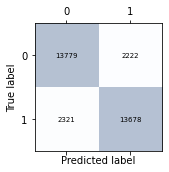

In [ ]:
confmat = sklearn.metrics.confusion_matrix(y, predicted)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('ConMatrix.png', dpi=600)
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.88      0.86      4786
        True       0.88      0.84      0.86      4814

    accuracy                           0.86      9600
   macro avg       0.86      0.86      0.86      9600
weighted avg       0.86      0.86      0.86      9600



## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 13))
w_range = ['uniform', 'distance']
m_range = list(range(2, 3))
param_grid = dict(n_neighbors=k_range, weights=w_range, p=m_range)
grid = GridSearchCV(knc, param_grid, cv=5, verbose=5, error_score='raise')
grid_search=grid.fit(X, y)
print('The best value found for the hyperparameter number of neighbors is ' + str(grid_search.best_params_['n_neighbors']))
print('The best value found for the hyperparameter weight is ' + str(grid_search.best_params_['weights']))
print('The best value found for the hyperparameter p is ' + str(grid_search.best_params_['p']))

print('The best result on the training set using 5-Fold CV was ' + str(grid_search.best_score_))
y_pred = grid_search.predict(X)
print('The best result predicting the test set was ' + str(accuracy_score(y, y_pred)))
confusion_matrix(y, y_pred)

## ROC Graph

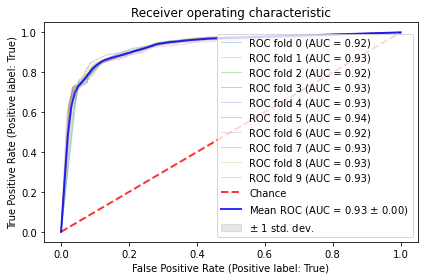

In [ ]:
# source https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True)
# plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    knc.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        knc,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic",
)
ax.legend(loc="lower right")
plt.tight_layout()
plt.savefig('KNN-ROC.png', dpi=600)
plt.show()

## Classification report

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn import metrics


cv = StratifiedKFold(n_splits=10, shuffle=True)

for i, (train, test) in enumerate(cv.split(X, y)):
    knc.fit(X[train], y[train])
    y_pred = knc.predict(X[test])
    print(i)
    print(sklearn.metrics.confusion_matrix(y[test], y_pred))
    print(metrics.classification_report(y[test], y_pred))


0
[[1419  182]
 [ 231 1368]]
              precision    recall  f1-score   support

       False       0.86      0.89      0.87      1601
        True       0.88      0.86      0.87      1599

    accuracy                           0.87      3200
   macro avg       0.87      0.87      0.87      3200
weighted avg       0.87      0.87      0.87      3200

1
[[1432  168]
 [ 267 1333]]
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1600
        True       0.89      0.83      0.86      1600

    accuracy                           0.86      3200
   macro avg       0.87      0.86      0.86      3200
weighted avg       0.87      0.86      0.86      3200

2
[[1413  187]
 [ 244 1356]]
              precision    recall  f1-score   support

       False       0.85      0.88      0.87      1600
        True       0.88      0.85      0.86      1600

    accuracy                           0.87      3200
   macro avg       0.87      0.87      0.